# Specialized dictionaries
> `defaultdict`: automatic default for missing keys <br>
> `OrderDict`: available in py 3.6 and higher <br>
> `Counter`: specialized tool for dealing with counters <br>
> `ChainMap`: efficient way of combining multiple dictionaries <br>
> `UserDict`: alternative to subclassing `dict` for creating custom dictionary types <br>

## Default Dictionary
> Takes in a callable, the output of the callable becomes the key of the dictionary. This approach allows default values that can be dynamic (eg: a timestamp) when specific keys are presented or missing. <br>
> Anoter big advantage is that once the default dicionary is defined it can be used across all of the code keeping a centralised point or change instead of hard coding many dictionaries.
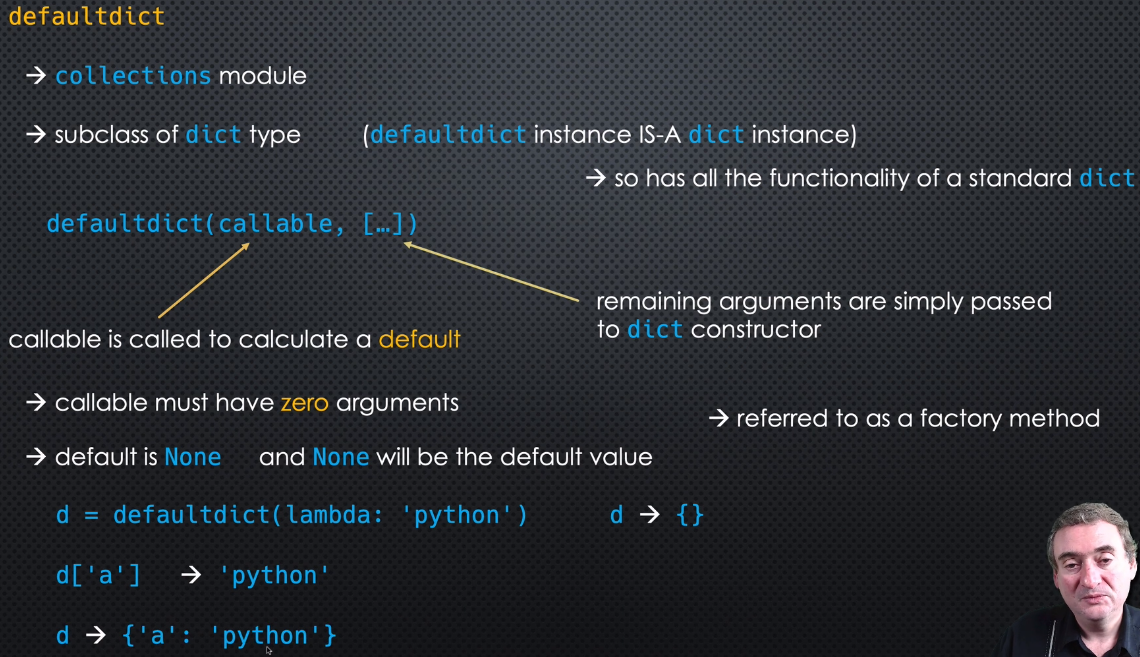

### Challenge 1

> Create a simple default dictionary & highlight the differences in the approach of a `default dictionary` and a normal dictionary.

Refactor the code using a default dictionary:
```
sentence = "able was I ere I saw elba"
counts = {}
for c in sentence:
    counts[c] = counts.get(c, 0) + 1
```

- Create a default dictionary named `counts` that returns value `0` when called.
- Use `counts` to count the number of occurences in `sentence`.
- Explain how defaultdict works, what it takes as input & what it outputs.

In [ ]:
# Example
from collections import defaultdict

sentence = "able was I ere I saw elba"

# Create the default dict.
counts = defaultdict(lambda: 0)

# Note! when called with an inexisting key it will execute the lambda
# function and output the result of the lambda
print('Default dictionanry output when called:', counts['x'])

for c in sentence:
    counts[c] += 1

print(counts)

### Challenge 2

> A use case to showcase the utility of the default dictionary.

Using `persons`:
```
persons = {
    'john': {'age': 20, 'eye_color': 'blue'},
    'jack': {'age': 25, 'eye_color': 'brown'},
    'jill': {'age': 22, 'eye_color': 'blue'},
    'eric': {'age': 35},
    'michael': {'age': 27}
}
```

- Write a block of code that creates a dictionary where:
> - The dictionary key is the eye color Eg: 'blue'
> - The dictionary value is the name of the person Eg: 'john'
> - Assign the dictionary to variable `eye_colors`
> - Where the eye color is missing add value `unknown`

Output: <br>
```
{'blue': ['john', 'jill'], 'brown': ['jack'], 'unknown': ['eric', 'michael']}
```

In [ ]:
# Example

persons = {
    'john': {'age': 20, 'eye_color': 'blue'},
    'jack': {'age': 25, 'eye_color': 'brown'},
    'jill': {'age': 22, 'eye_color': 'blue'},
    'eric': {'age': 35},
    'michael': {'age': 27}
}


eye_colors = defaultdict(list)

for person, details in persons.items():
    color = details.get('eye_color', 'unknown')
    eye_colors[color].append(person)

eye_colors

### Challenge 3

> Default dictionary with undeterministic data.

Import:
```
from collections import defaultdict, namedtuple
from datetime import datetime
from functools import wraps
```

- Create a decorator factory function named `function_stats` that:
> - makes use of a default dictionary to `count` the number of times a function was called & to record when it was `first_called` (timestamp using datetime)
> - the function outputs a named tuple called `Stats` with two fields `decorator` & `data`. The `decorator` contains the decorator function and `data` contains the default dict with `count` and `first_called`
> - inside `function_stats` write the `decorator` and `wrapper` parts that add to default dictionary the name of the function the `count` of times it was called 
> - make user of `wraps` to pass the metadata of the function

Usage: <br>
```
stats = function_stats()


@stats.decorator
def func_1():
    pass


@stats.decorator
def func_2(x,y):
    pass


func_1()
stats.decorator
```

Output: <br>
```
>>>defaultdict(<function __main__.function_stats.<locals>.<lambda>()>,
>>>            {'func_1': {'count': 1,
>>>              'first_called': datetime.datetime(2022, 3, 8, 12, 15, 10, >>>718427)}})
```

In [ ]:
# Example
from collections import defaultdict, namedtuple
from datetime import datetime
from functools import wraps


def function_stats():
    d = defaultdict(lambda: {'count': 0, 'first_called': datetime.utcnow()})
    Stats = namedtuple('Stats', 'decorator data')

    def decorator(fn):
        @wraps(fn)
        def wrapper(*args, **kwargs):
            d[fn.__name__]['count'] += 1
            return fn(*args, **kwargs)
        return wrapper

    return Stats(decorator, d)


stats = function_stats()


@stats.decorator
def func_1():
    pass


@stats.decorator
def func_2(x,y):
    pass


func_1()
stats.data

In [ ]:
# needs work

---

## Ordered dictionary
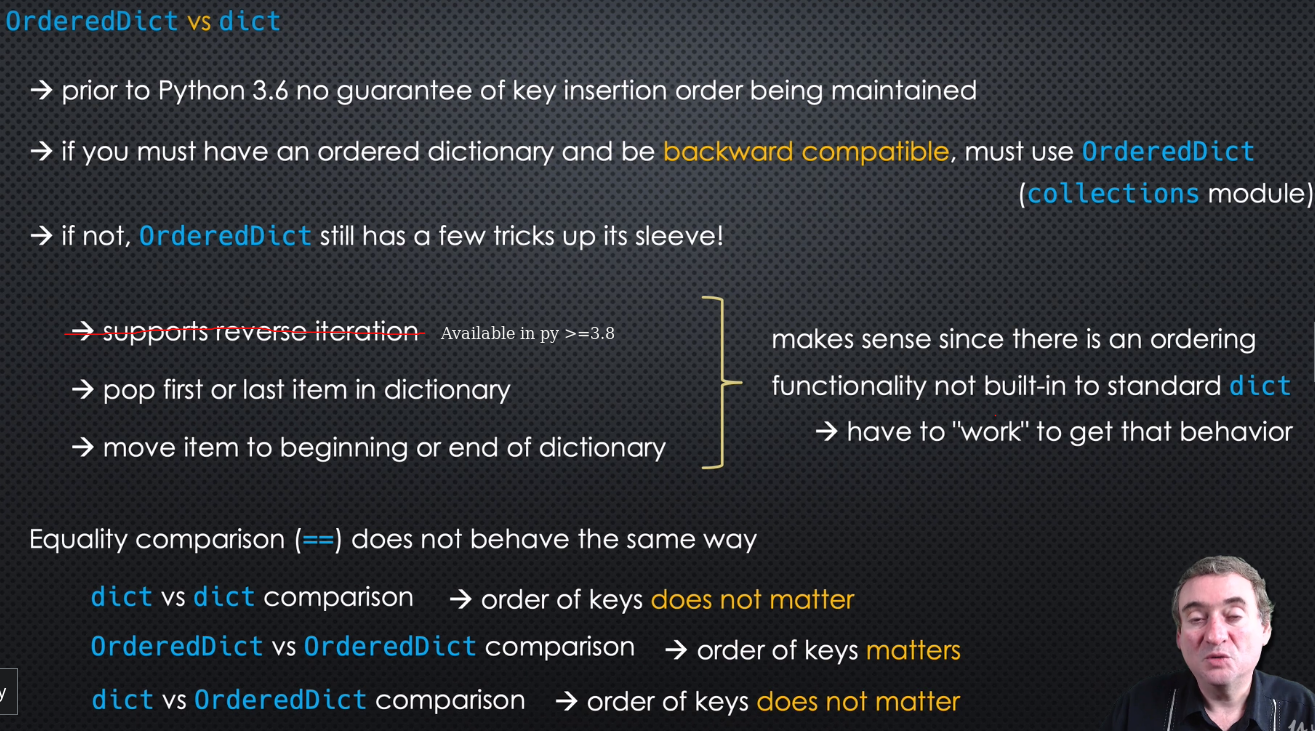

### Challenge 1

> Pop the first and last item in a dictinary.

Create a function called `popitem` that takes in a dictionary argument `d = dict(a=1, b=2, c=3, d=4)` and pops the first and the last item of a dictionary, one at a time.

In [38]:
# Example

def popitem(d, last=True):
    if last:
        # by default pops the last item
        return d.popitem()
    else:
        first_key = next(iter(d))
        return first_key, d.pop(first_key)


d = dict(a=1, b=2, c=3, d=4)

popitem(d, last=False)

('a', 1)

### Challenge 2

> OrderedDict equality. We can use OrderedDict to determine if 2 dictionaries have the same key order.

Using dictionaries:
```
d1 = {'a': 10, 'b': 20, 'c': 30}
d2 = {'b': 20, 'c': 30, 'a': 10}
```
- Check if dictionary `d1` is equal to dictionary `d2`
- Create a function named `dict_equal_sensitive` using `OrderedDict` to check if the keys have the same order.

In [49]:
# Example

d1 = {'a': 10, 'b': 20, 'c': 30}
d2 = {'b': 20, 'c': 30, 'a': 10}


print(d1 == d2)


def dict_equal_order(d1, d2):
    if d1 == d2:
        return OrderedDict(d1) == OrderedDict(d2)
    else:
        return False

dict_equal_order(d1, d2)

True


False

---

## Counter
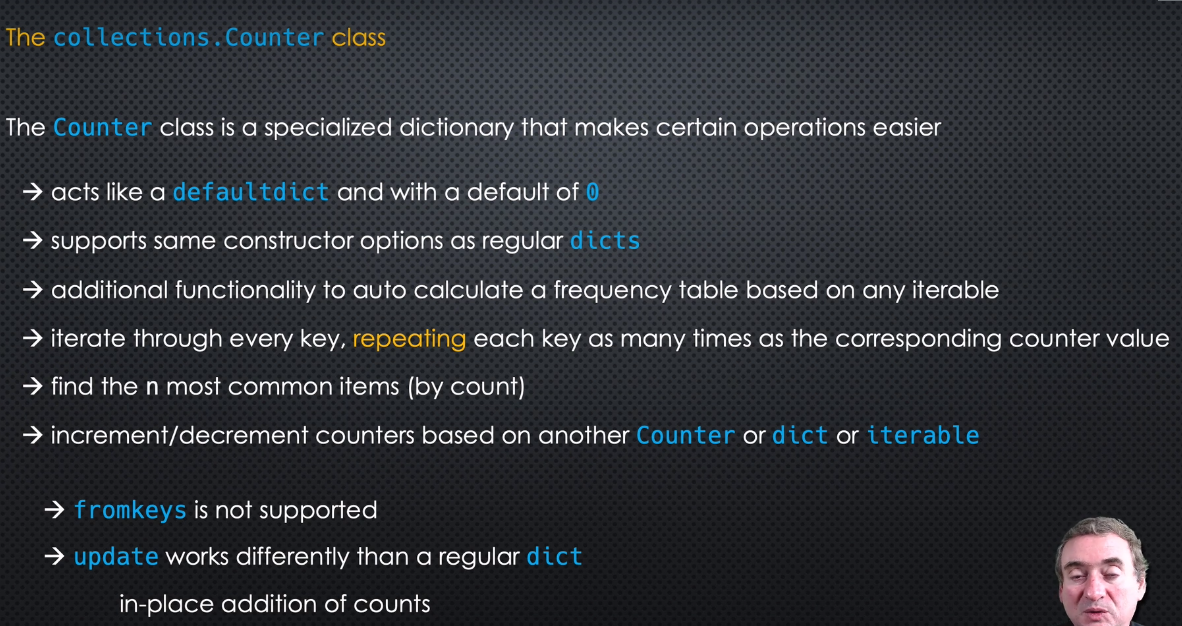

### Challenge 1

> Simple use of counter with strings.

Using: 
```
sentence = 'the quick brown fox jumps over the lazy dog'
```
- Count the number of occurences using `Counter`.

In [1]:
# Example
from collections import Counter

sentence = 'the quick brown fox jumps over the lazy dog'

Counter(sentence)

Counter({'t': 2,
         'h': 2,
         'e': 3,
         ' ': 8,
         'q': 1,
         'u': 2,
         'i': 1,
         'c': 1,
         'k': 1,
         'b': 1,
         'r': 2,
         'o': 4,
         'w': 1,
         'n': 1,
         'f': 1,
         'x': 1,
         'j': 1,
         'm': 1,
         'p': 1,
         's': 1,
         'v': 1,
         'l': 1,
         'a': 1,
         'z': 1,
         'y': 1,
         'd': 1,
         'g': 1})

### Challenge 2

> Counter with lists.

- Using `randint` from `random` create a list of `1_000` elements containing integers from 0 to 10 and assign it to `my_list`.
- Get the frequency of each number.

In [2]:
# Example

import random
random.seed(0)

my_list = [random.randint(0, 10) for i in range(1_000)]
Counter(my_list)

Counter({6: 95,
         0: 97,
         4: 91,
         8: 76,
         7: 94,
         5: 89,
         9: 85,
         3: 80,
         2: 88,
         1: 107,
         10: 98})

### Challenge 3

> Using counter with regex.

Using sentence:
```
sentence = '''
his module implements pseudo-random number generators for various distributions.

For integers, there is uniform selection from a range. For sequences, there is uniform selection of a random element, a function to generate a random permutation of a list in-place, and a function for random sampling without replacement.

On the real line, there are functions to compute uniform, normal (Gaussian), lognormal, negative exponential, gamma, and beta distributions. For generating distributions of angles, the von Mises distribution is available.

Almost all module functions depend on the basic function random(), which generates a random float uniformly in the semi-open range [0.0, 1.0). Python uses the Mersenne Twister as the core generator. It produces 53-bit precision floats and has a period of 2**19937-1. The underlying implementation in C is both fast and threadsafe. The Mersenne Twister is one of the most extensively tested random number generators in existence. However, being completely deterministic, it is not suitable for all purposes, and is completely unsuitable for cryptographic purposes.'''
```

- Create a regex expression that splits the sentence in a list of individual words using re package and assign it to `words`.
- Find top 5 most common words and assign it. 

In [3]:
# Example

import re

sentence = '''
his module implements pseudo-random number generators for various distributions.

For integers, there is uniform selection from a range. For sequences, there is uniform selection of a random element, a function to generate a random permutation of a list in-place, and a function for random sampling without replacement.

On the real line, there are functions to compute uniform, normal (Gaussian), lognormal, negative exponential, gamma, and beta distributions. For generating distributions of angles, the von Mises distribution is available.

Almost all module functions depend on the basic function random(), which generates a random float uniformly in the semi-open range [0.0, 1.0). Python uses the Mersenne Twister as the core generator. It produces 53-bit precision floats and has a period of 2**19937-1. The underlying implementation in C is both fast and threadsafe. The Mersenne Twister is one of the most extensively tested random number generators in existence. However, being completely deterministic, it is not suitable for all purposes, and is completely unsuitable for cryptographic purposes.'''

words = re.split('\W', sentence)
word_counter = Counter(words)
word_counter.most_common(5)

[('', 38), ('a', 8), ('random', 7), ('is', 7), ('the', 7)]

### Challenge 4

> Loop over all the elements in counter.

- Using `word = 'abba'` count the frequency of the elements.
- Iterate over all elements in `word` (should be 4 iterations) and print the elements.

In [8]:
# Example

word = 'abba'
word_counter = Counter(word)
print(word_counter)

for i in word_counter.elements():
    print(i)

Counter({'a': 2, 'b': 2})
a
a
b
b


### Challenge 5

> Update a counter from another iterable or counter.

Using:
```
c1 = Counter(a=1, b=2, c=3)
c1 = Counter(b=1, c=2, d=3)
```
- Update the content of `c1` with the content of `c2`.
- What happens when udpdating an Counter dictionary?

In [11]:
# Example

c1 = Counter(a=1, b=2, c=3)
c2 = Counter(b=1, c=2, d=3)

c1.update(c2)
c1

# When updating Counter dictionary the result will be  a combination aka
# addition/substraction of the values Eg: c2 == 5

Counter({'a': 1, 'b': 3, 'c': 5, 'd': 3})

### Challenge 6

> Counter instances subtractions.

Using:
```
c1 = Counter(a=1, b=2, c=3)
c2 = Counter(b=1, c=2, d=3)
```
- Perform a subtraction of elements.

In [18]:
# Example

c1 = Counter(a=1, b=2, c=3)
c2 = Counter(a=1, b=2, c=3)

c1.subtract(c2)
c1

Counter({'a': 0, 'b': 0, 'c': 0})

### Challenge 7

> Counter update with an iterable.

Using:
```
c1 = Counter('aabbccddee')
```
- Update `c1` with string `abcdef`.

In [20]:
# Example

c1 = Counter('aabbccddee')
print(c1)
c1.update('abcdef')
print(c1)
# Each element has +1 and `f` was added entirely

Counter({'a': 2, 'b': 2, 'c': 2, 'd': 2, 'e': 2})
Counter({'a': 3, 'b': 3, 'c': 3, 'd': 3, 'e': 3, 'f': 1})


### Challenge 8

> Counter addition without mutation.

Using:
```
c1 = Counter('aabbcc')
c2 = Counter('abc')
```
- Perform an addition between `c1` and `c2` without mutating any of the couters.

In [23]:
# Example

c1 = Counter('aabbcc')
c2 = Counter('abc')

c1 + c2
# Note: This addition will result in another Counter instance 
# leaving c1 and c2 unchanged

Counter({'a': 3, 'b': 3, 'c': 3})

### Challenge 9

> Combining counters with condition.

Using:
```
c1 = Counter(a=5, b=1)
c2 = Counter(a=1, b=10)
```

- Combine the two Counter instances keeping the minimum values of the two objects.
- Combine the two Counter instances keeping the maximum values of the two objects.

In [25]:
# Example

c1 = Counter(a=5, b=1)
c2 = Counter(a=1, b=10)

# Keeping the max values from the two Counters
print(c1 | c2)

# Keeping the min values from the two Counters
print(c1 & c2)

Counter({'b': 10, 'a': 5})
Counter({'a': 1, 'b': 1})


### Challenge 10

> Counters keep only positive values.

Using:
```
c1 = Counter(a=10, b=-10)
```
- Keep only positive values

In [26]:
# Example
c1 = Counter(a=10, b=-10)

+c1

Counter({'a': 10})

### Challenge 11

> Counters keep only negative values.

Using:
```
c1 = Counter(a=10, b=-10)
```
- Keep only negative values

In [27]:
# Example

c1 = Counter(a=10, b=-10)
-c1

Counter({'b': 10})

---

## ChainMap
- Chains dictionaries like `chain` from itertools
- With `ChainMap` we can mutate dictionaries
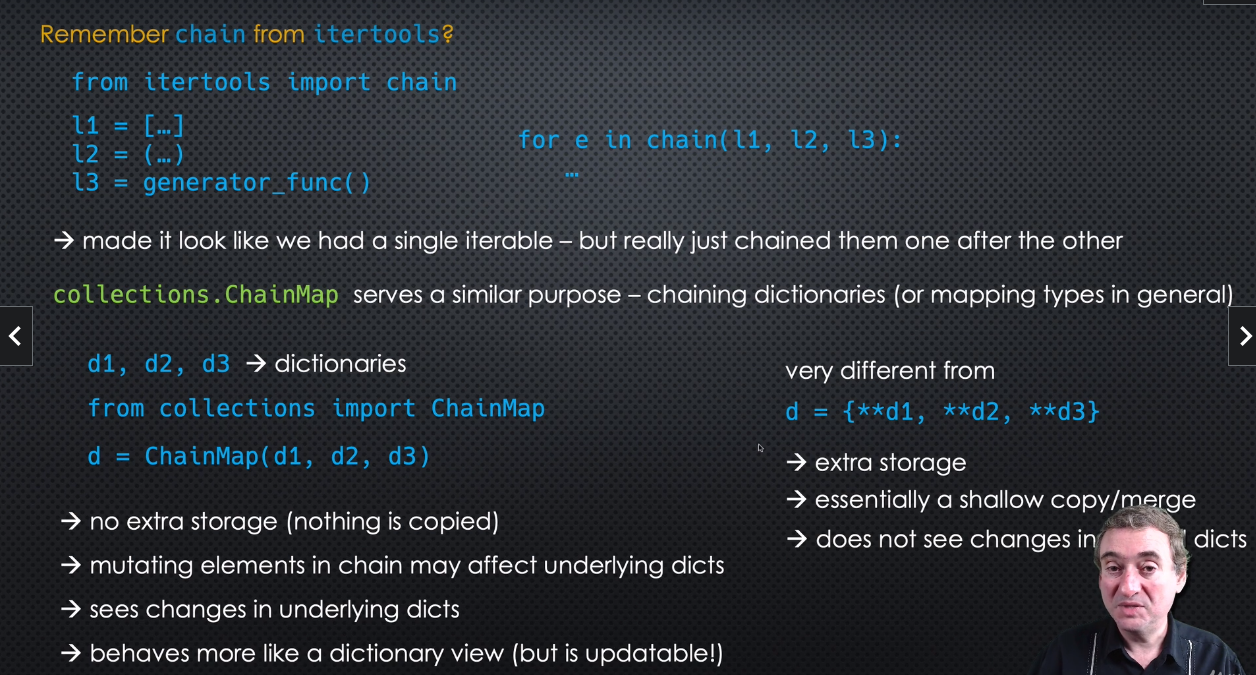

Note!:
- Orders of the dictionaries passed in the chain is important. If 2 dicts provided with a common key but different values the one picked is the one residing in the first dictionary passed.

### Challenge 1

> Simple chaining and difference from unpacking.

Using: 
```
d1 = {'a': 1, 'b': 2}
d2 = {'c': 3, 'd': 4}
d3 = {'e': 5, 'f': 6}
```

- Create a dictionary `d_unpack` by unpacking `d1, d2, d3` in d.
- Create a chain `d_chain` from `d1, d2, d3`
- What is the difference in terms of memory usage between the two dictionaries?

In [6]:
# Example
from collections import ChainMap

d1 = {'a': 1, 'b': 2}
d2 = {'c': 3, 'd': 4}
d3 = {'e': 5, 'f': 6}

d_unpack = {**d1, **d2, **d3}
d_chain = ChainMap(d1, d2, d3)
print(d_chain)
# Note: d_chain does not create a shallow copy from the previous dictionaries
# while d_unpack does.

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6}

### Challenge 2

> Handilng dictionary collisions between ChainMap and unpacking

Using:
```
d1 = {'a': 1, 'b': 2}
d2 = {'b': 20, 'c': 3}
d3 = {'c': 30, 'd': 4}
```

- Create a new dict named `d_unpack` by unpacking `d1-d3`.
- Create a chainmap named `d_chain` by chaining `d1-d3`.
- What is the order in which unpacking and chaining deal with collisions?
- How is the first dictionary in a chain named?
- How are the subsequent dictionaries in a chained named?

In [11]:
# Example

d1 = {'a': 1, 'b': 2}
d2 = {'b': 20, 'c': 3}
d3 = {'c': 30, 'd': 4}

d_unpack = {**d1, **d2, **d3}
# The value for 'b' and 'c' is from the last instance (input) 
# of the dictionary. The last dict to be unpacked is d3 therefor values in 
# d3 will overwrite the previous values
print(d_unpack)

d_chain = ChainMap(d1, d2, d3)
# The chainmap makes the first dictionary as primary (called child dictionary)
# if the value is not found it defaults to the second then the third and so on.
# The subsequent dictionaries after child are called parent dictionaries.
print(d_chain['b'])

{'a': 1, 'b': 20, 'c': 30, 'd': 4}
2


### Challenge 3

> How chainmap deals with inserts, deletes and updates.

Using:
```
d1 = {'a': 1, 'b': 2}
d2 = {'c': 3, 'd': 4}
d3 = {'e': 5, 'f': 6}
```

- Create a chainmap `d` from `d1-d3`.
- Update the key `c` in chianmap `d` with the value 300.
- Where did the insertion occur, in which dictionary?
- What if we delete or update a value, where is the change going to occur?

In [14]:
# Example

d1 = {'a': 1, 'b': 2}
d2 = {'c': 3, 'd': 4}
d3 = {'e': 5, 'f': 6}

d = ChainMap(d1, d2, d3)

d['c'] = 300

# all the modifications in a chainmap take place on the child dictionary only.
print(d)

ChainMap({'a': 1, 'b': 2, 'c': 300}, {'c': 3, 'd': 4}, {'e': 5, 'f': 6})


### Challenge 4

> Manipulating chainma and mutating.

Using:
```
d1 = {'a': 1, 'b': 2}
d2 = {'c': 3, 'd': 4}
d3 = {'d':400, 'e': 5 }
d = ChainMap(d1, d2)
```

- Add a new child dictionary `d3` to chainmap `d`.
- Check what are the partens dictionaries
- Get a list of all dictionaries in chainmap
- Append a new dict `{'e': 5, 'f': 6}` to chainmap `d`.

In [31]:
# Example

d1 = {'a': 1, 'b': 2}
d2 = {'c': 3, 'd': 4}
d3 = {'d': 400, 'e': 5}

d = ChainMap(d1, d2)

d.new_child(d3)
print('Parent dictionaries:', d.parents)
print('List of all dictionaries:', d.maps)

# This is a mutation of the chainmap
d.maps.append({'e': 5, 'f': 6})
print('Check appended dict:', d)

Parent dictionaries: ChainMap({'c': 3, 'd': 4})
List of all dictionaries: [{'a': 1, 'b': 2}, {'c': 3, 'd': 4}]
Check appended dict: ChainMap({'a': 1, 'b': 2}, {'c': 3, 'd': 4}, {'e': 5, 'f': 6})


### Challenge 5

> Chainmap usecase.

Using an imported config:
```
config = {
    'host': 'prod.deepdive.com',
    'port': 5432,
    'database': 'deepdive',
    'user_id': '$pg_user',
    'user_pwd': '$pg_pwd'
}
```

- Create a local config file named `local_config` where we want to change `user_id` and `user_pwd` to `test` whithout mutating the `config` file itself.

In [35]:
# Example

config = {
    'host': 'prod.deepdive.com',
    'port': 5432,
    'database': 'deepdive',
    'user_id': '$pg_user',
    'user_pwd': '$pg_pwd'
}

local_config = ChainMap({}, config)
local_config['user_id'] = 'test'
local_config['user_psw'] = 'test'
print('local configuration:', local_config, '\n')
print('initial configuration:', config)

local configuration: ChainMap({'user_id': 'test', 'user_psw': 'test'}, {'host': 'prod.deepdive.com', 'port': 5432, 'database': 'deepdive', 'user_id': '$pg_user', 'user_pwd': '$pg_pwd'}) 

initial configuration: {'host': 'prod.deepdive.com', 'port': 5432, 'database': 'deepdive', 'user_id': '$pg_user', 'user_pwd': '$pg_pwd'}


---

## User dict
> - The big usecase is to define a dictinary like (map object) data structure that can be customised (impose restrictions, transforms etc) without loosing funtionality like `views, updates etx`. 
> - If building a custom dict using subclassing we want to use the `userdict` not the `dict` class. Our custom class will only override the specified behavior however will not override unspecified behavior. For example when having a custom dict class and we override the `__getitem__` method this will not be called when we do a `dict.update()` therefor getting incompatibilities. 

### Challenge 1

> Use the UserDict as a parent class to create a custom dictionary. Allowes all functionalities of a dictionary to work.

Create a class named `IntDict` that takes in a `Real` number and outputs an `int` value (Eg: 10.5 -> 10) and inherits from `UserDict` class and has two methods (no constructor):
- `__setitem__`:
> takes a `key` and a `value` checks if `value` is type `Real`. If true delegates the `__setitem__` functionality to the parent class else raises a `ValueError` with text `'Value must be a real number.'` 
- `__getitem__`: 
> takes a `key` and returns an `int` representation of the `Real` number.

Note: Dependencies `Real` from `numbers`

Output:
```
>>> d = IntDict()
>>> d['a'] = 10.5
>>> d.get('a')
10
```

In [11]:
# Example

from numbers import Real
from collections import UserDict


class IntDict(UserDict):
    def __setitem__(self, key, value):
        if not isinstance(value, Real):
            raise ValueError('Value must be a real number.')
        super().__setitem__(key, value)

    def __getitem__(self, key):
        return int(super().__getitem__(key))

d = IntDict()
d['a'] = 10.5
d.get('a')

10

### Challenge n

> xxx

xxx

# Sandbox

In [78]:
def nb_dig(n, d):
    return sum([str(e**2).count('1') for e in range(n+1)])

nb_dig(25, 1)

11